# **Imports**

In [ ]:
# from google.colab.patches import cv2_imshow # If using google colab

# Current version
#!git clone https://github.com/alok-ai-lab/pyDeepInsight.git
#!pip install -r requirements.txt # Install pyDeepinsight requirements
#!python -m pip -q install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight

# Version used in the paper (commit hash: 4f5afea)
# !python -m pip install -q "git+https://github.com/alok-ai-lab/pyDeepInsight.git@4f5afea#egg=DeepInsight"

In [5]:
import pickle
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from pyDeepInsight.image_transformer import ImageTransformer, LogScaler  # Version used in the paper
#from pyDeepInsight.image_transformer import ImageTransformer  # Current version
#from pyDeepInsight.utils import Norm2Scaler # For current version
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
# Funcitons

# Funcitons

def quality(fdm, total_features):

  uniques, count = np.unique(fdm, return_counts=True)
  frequencies = np.asarray((uniques, count))

  overlapped_features = 0
  overlapped_pixels = 0

  fdm_array = fdm.flatten()

  for i in fdm_array:
    if i > 1: overlapped_features = overlapped_features + i

  for i in fdm_array:
    if i > 1: overlapped_pixels = overlapped_pixels + 1

  overlapped_features_percent = (overlapped_features/total_features)*100
  overlapped_pixels_percent = (overlapped_pixels/np.size(fdm))*100

  return overlapped_features_percent, overlapped_pixels_percent, overlapped_features, overlapped_pixels


# Overlap

def overlap(num_px, fdm, it):

  px_sizes = list(range(2, num_px+1))

  ov_features_p = []
  ov_pixels_p = []
  ov_features = []
  ov_pixels = []

  for i in px_sizes:
    it.pixels = i
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    ov_f_p, ov_p_p, ov_f, ov_p = quality(fdm, X_train.shape[1])

    ov_features_p.append(ov_f_p)
    ov_pixels_p.append(ov_p_p)
    ov_features.append(ov_f)
    ov_pixels.append(ov_p)

  fig, ax = plt.subplots(figsize=(10, 7))

  ax.plot(px_sizes, ov_features_p, label='Overlapped Features %')
  ax.set_title('Overlapped Features per Matrix size')
  ax.plot(px_sizes, ov_pixels_p, label='Overlapped Pixels %')
  ax.set(xlabel='Matrix Size', ylabel='Percentage')
  ax.legend(loc='upper right')

  #for i in range(0, len(px_sizes)):
  # print(f'M_Size: {px_sizes[i]}, OF {ov_features[i]}')

  print(f'Minimum overlap: M_Size: {px_sizes[np.argmin(ov_features)]}, OF: {ov_features[np.argmin(ov_features)]}')

  fdm = it.feature_density_matrix()
  fdm[fdm == 0] = np.nan

  plt.figure(figsize=(5, 5))

  ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01,
                  linecolor="lightgrey", square=True)
  ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
  for _, spine in ax.spines.items():
      spine.set_visible(True)
  _ = plt.title("Features per pixel")

  return None

# **Import Congenital Syphilis Dataset**

In [7]:
X_train = pd.read_csv('datasets/tabular/X_train.csv', sep=';')
X_test = pd.read_csv('datasets/tabular/X_train.csv', sep=';')

y_train = pd.read_csv('datasets/tabular/y_train.csv', sep=';')
y_test = pd.read_csv('datasets/tabular/y_test.csv', sep=';')

In [8]:
shapes = pd.DataFrame(
    {

      "Train": [X_train.shape, y_train.shape],
      "Test": [X_test.shape, y_test.shape],
    }, index=['x', 'y']
)

shapes

,Train,Test
x,"(1321, 61)","(1321, 61)"
y,"(1321, 1)","(331, 1)"


# **DeepInsight**

In [9]:
ln = LogScaler() # Renamed to Norm2Scaler in current version
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

tsne = TSNE(
      n_components=2,
      perplexity=5,
      metric='cosine',
      random_state=1701,
      n_jobs=-1)

pca = PCA(
    n_components=2,
    random_state=1701)

kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    random_state=1701,
    n_jobs=-1)

In [10]:
it = ImageTransformer(feature_extractor=tsne, pixels=50,  random_state=1701, n_jobs=-1)
itpca = ImageTransformer(feature_extractor=pca, pixels=50, random_state=1701, n_jobs=-1)
itkpca = ImageTransformer(feature_extractor=kpca, pixels=50, random_state=1701, n_jobs=-1)

f:\Users\Leo\Documents\Projects\FAI\Congenital-Syphilis-CNN-Classification\venv310\lib\site-packages\pyDeepInsight\image_transformer.py:93: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_new[:, 0], x_new[:, 1], s=1,


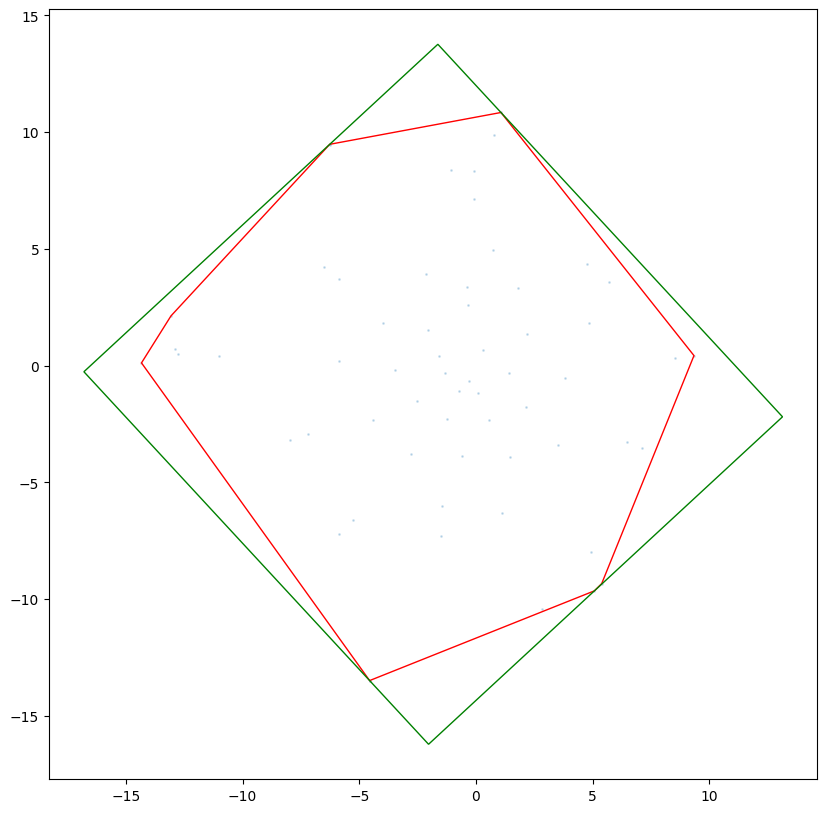

f:\Users\Leo\Documents\Projects\FAI\Congenital-Syphilis-CNN-Classification\venv310\lib\site-packages\pyDeepInsight\image_transformer.py:93: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_new[:, 0], x_new[:, 1], s=1,


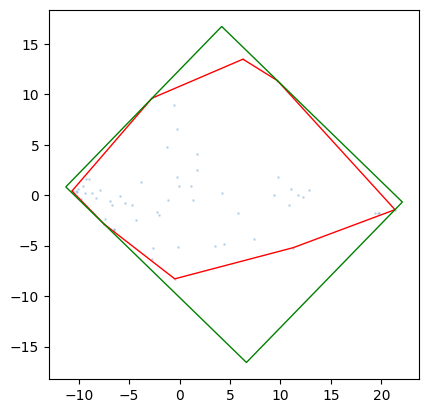

f:\Users\Leo\Documents\Projects\FAI\Congenital-Syphilis-CNN-Classification\venv310\lib\site-packages\pyDeepInsight\image_transformer.py:93: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_new[:, 0], x_new[:, 1], s=1,


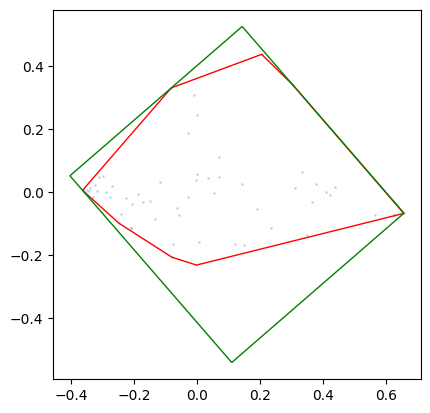

In [11]:
plt.figure(figsize=(10, 10))
_ = it.fit(X_train_norm, plot=True)
__ = itpca.fit(X_train_norm, plot=True)
___ = itkpca.fit(X_train_norm, plot=True)

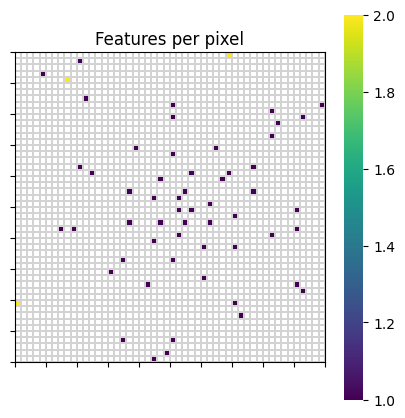

In [12]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(5, 5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01,
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Features per pixel")

f: 59.0, px:9
f: 55.0, px:18
f: 51.0, px:17
f: 45.0, px:18
f: 44.0, px:19
f: 35.0, px:15


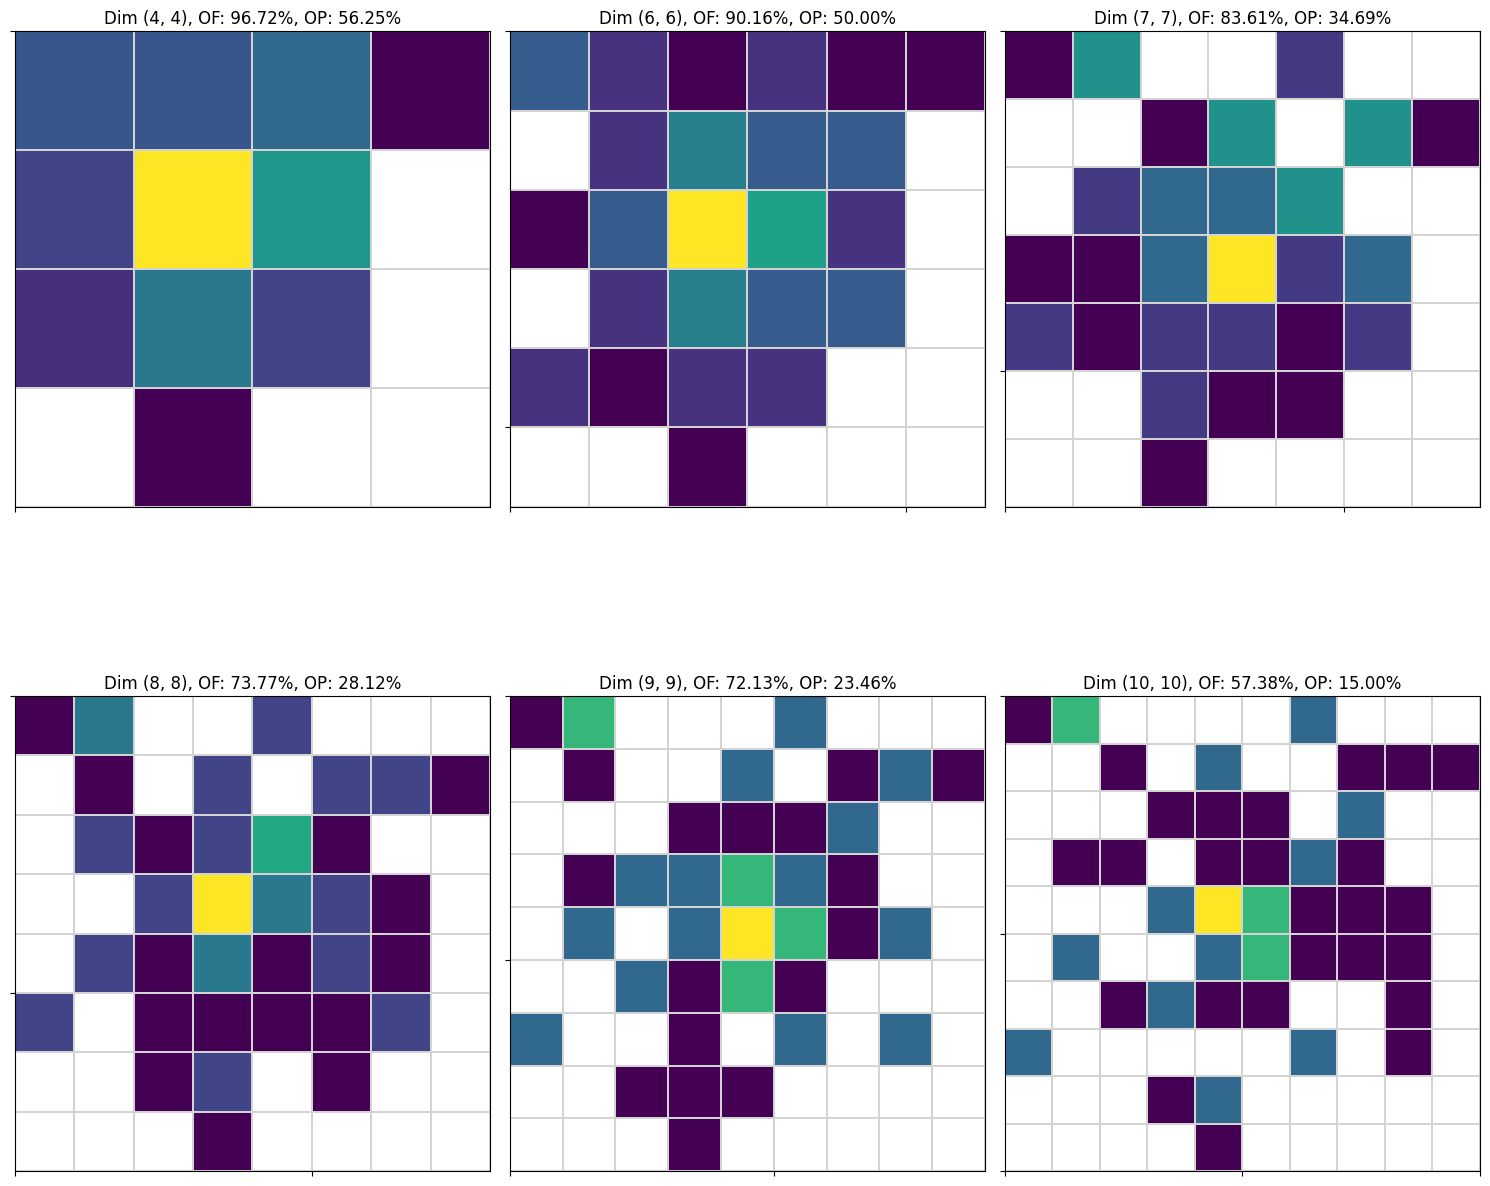

In [13]:
px_sizes = [4, 6, 7, 8, 9, 10]

fig, ax = plt.subplots(2, 3, figsize=(15, 15))
ax = ax.flatten()

for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01,
                      linecolor="lightgrey", square=True,
                      ax=ax[ix], cbar=False)
    o_f, o_px, f, px = quality(fdm, X_train.shape[1])
    cax.set_title(f'Dim {it.pixels}, OF: {o_f:.2f}%, OP: {o_px:.2f}%')
    print(f'f: {f}, px:{px}')
    #cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()

**Feature and pixel overlap percentage  percentage by matrix size**

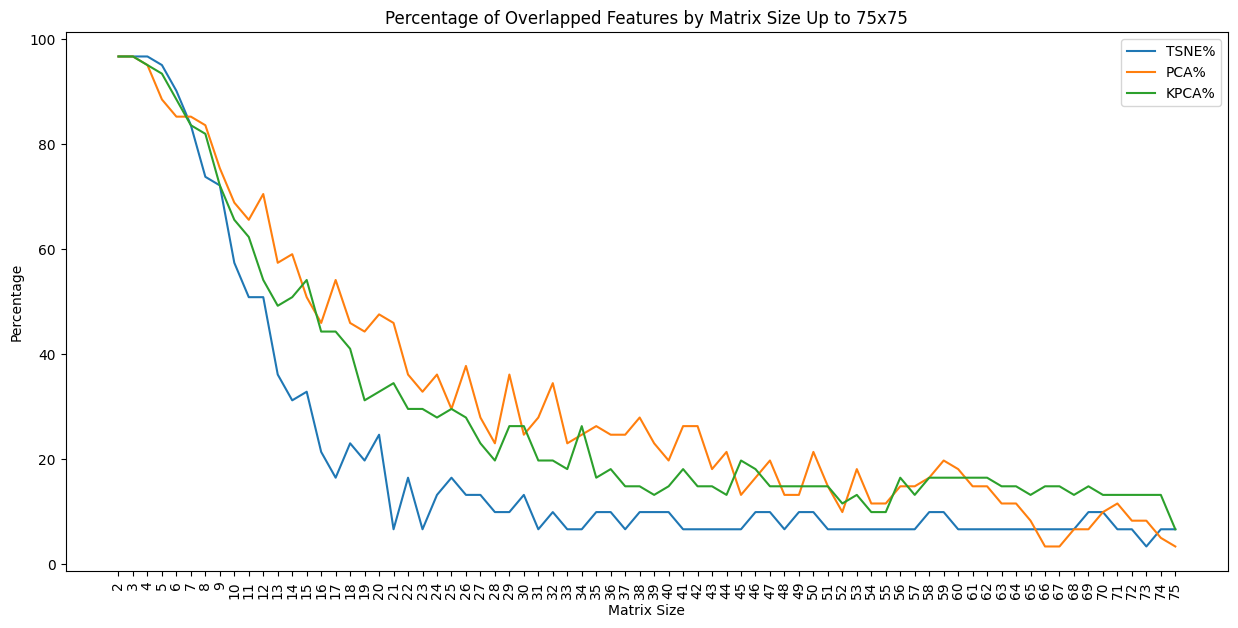

In [14]:
num_px=75

px_sizes = list(range(2, num_px+1))

tsne_ov_features_p = []
tsne_ov_pixels_p = []
tsne_ov_features = []
tsne_ov_pixels = []

pca_ov_features_p = []
pca_ov_pixels_p = []
pca_ov_features = []
pca_ov_pixels = []

kpca_ov_features_p = []
kpca_ov_pixels_p = []
kpca_ov_features = []
kpca_ov_pixels = []

for i in px_sizes:
  it.pixels = i
  itpca.pixels = i
  itkpca.pixels = i

  fdm = it.feature_density_matrix()
  fdm[fdm == 0] = np.nan
  of, op, f, p = quality(fdm, X_train.shape[1])

  fdmpca = itpca.feature_density_matrix()
  fdmpca[fdmpca == 0] = np.nan
  ofpca, oppca, fpca, ppca = quality(fdmpca, X_train.shape[1])

  fdmkpca = itkpca.feature_density_matrix()
  fdmkpca[fdmkpca == 0] = np.nan
  ofkpca, opkpca, fkpca, pkpca = quality(fdmkpca, X_train.shape[1])

  tsne_ov_features_p.append(of)
  tsne_ov_pixels_p.append(op)
  tsne_ov_features.append(f)
  tsne_ov_pixels.append(p)

  pca_ov_features_p.append(ofpca)
  pca_ov_pixels_p.append(oppca)
  pca_ov_features.append(fpca)
  pca_ov_pixels.append(ppca)

  kpca_ov_features_p.append(ofkpca)
  kpca_ov_pixels_p.append(opkpca)
  kpca_ov_features.append(fkpca)
  kpca_ov_pixels.append(pkpca)

t_sne_min_m = px_sizes[np.argmin(tsne_ov_features_p)]
t_sne_min_f = tsne_ov_features_p[np.argmin(tsne_ov_features_p)]
t_sne_min_p = tsne_ov_pixels_p[np.argmin(tsne_ov_pixels_p)]

pca_min_m = px_sizes[np.argmin(pca_ov_features_p)]
pca_min_f = pca_ov_features_p[np.argmin(pca_ov_features_p)]
pca_min_p = pca_ov_pixels_p[np.argmin(pca_ov_pixels_p)]

kpca_min_m = px_sizes[np.argmin(kpca_ov_features_p)]
kpca_min_f = kpca_ov_features_p[np.argmin(kpca_ov_features_p)]
kpca_min_p = kpca_ov_pixels_p[np.argmin(kpca_ov_pixels_p)]

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(px_sizes, tsne_ov_features_p, label='TSNE%')
ax.plot(px_sizes, pca_ov_features_p, label='PCA%')
ax.plot(px_sizes, kpca_ov_features_p, label='KPCA%')

ax.set_title('Percentage of Overlapped Features by Matrix Size Up to 75x75')
ax.set(xlabel='Matrix Size', ylabel='Percentage')
ax.legend(loc='upper right')

plt.xticks(px_sizes)
l = plt.xticks(rotation=90)

In [ ]:
min_df = pd.DataFrame(
    {'Min OF%':[f'{t_sne_min_f:.2f}', f'{pca_min_f:.2f}', f'{kpca_min_f:.2f}'],
     'Min OP%': [f'{t_sne_min_p:.4f}', f'{pca_min_p:.4f}', f'{kpca_min_p:.4f}'],
     'Matrix Size':[f'{t_sne_min_m}x{t_sne_min_m}', f'{pca_min_m}x{pca_min_m}', f'{kpca_min_m}x{kpca_min_m}']
     }, index=['T-SNE', 'PCA', 'KPCA']
)

print('Mininum feature and pixel overlap in a matrix up to 75x75')
min_df

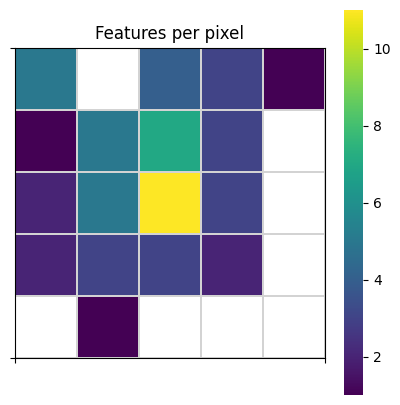

In [16]:
it.pixels = 5

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01,
                linecolor="lightgrey", square=True, vmin=1)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Features per pixel")


Minimum feature overlap: M_Size: 21, OF: 6.56


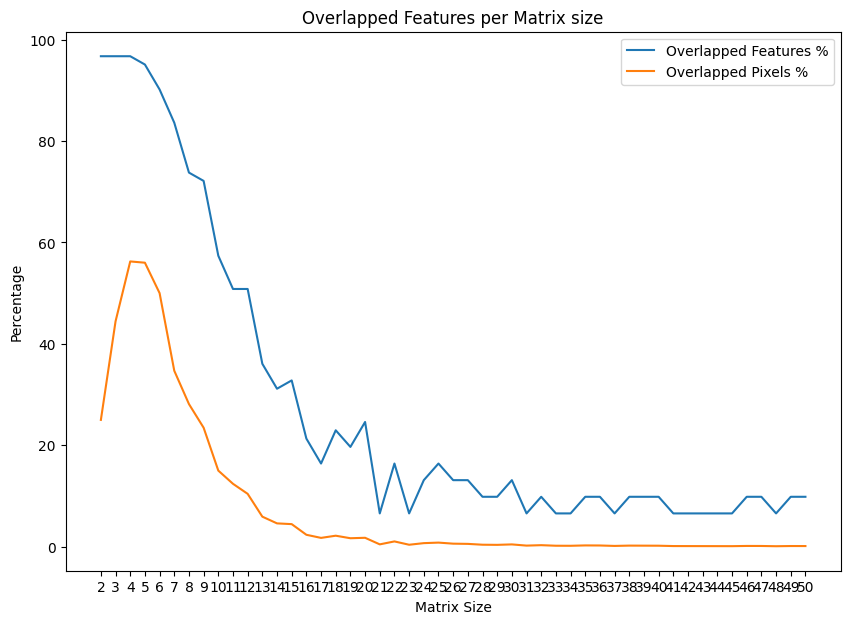

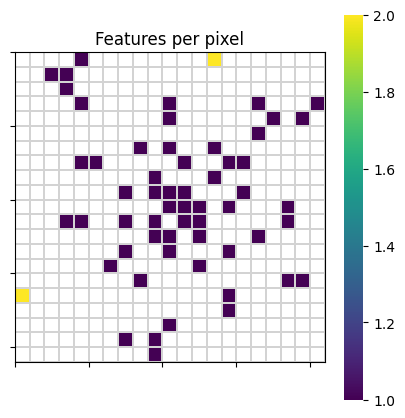

In [14]:
num_px=50

px_sizes = list(range(2, num_px+1))

ov_features_p = []
ov_pixels_p = []
ov_features = []
ov_pixels = []

for i in px_sizes:
  it.pixels = i
  fdm = it.feature_density_matrix()
  fdm[fdm == 0] = np.nan
  ov_f_p, ov_p_p, ov_f, ov_p = quality(fdm, X_train.shape[1])

  ov_features_p.append(ov_f_p)
  ov_pixels_p.append(ov_p_p)
  ov_features.append(ov_f)
  ov_pixels.append(ov_p)

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(px_sizes, ov_features_p, label='Overlapped Features %')
ax.set_title('Overlapped Features per Matrix size')
ax.plot(px_sizes, ov_pixels_p, label='Overlapped Pixels %')
ax.set(xlabel='Matrix Size', ylabel='Percentage')
ax.legend(loc='upper right')
plt.xticks(px_sizes)

a = ov_features_p[np.argmin(ov_features_p)]
print(f'Minimum feature overlap: M_Size: {px_sizes[np.argmin(ov_features_p)]}, OF: {a:.2f}')

it.pixels = px_sizes[np.argmin(ov_features)]

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(5, 5))
plt.xticks(rotation=90)

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01,
                linecolor="lightgrey", square=True, vmin=1)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Features per pixel")

## Convert data set

In [17]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

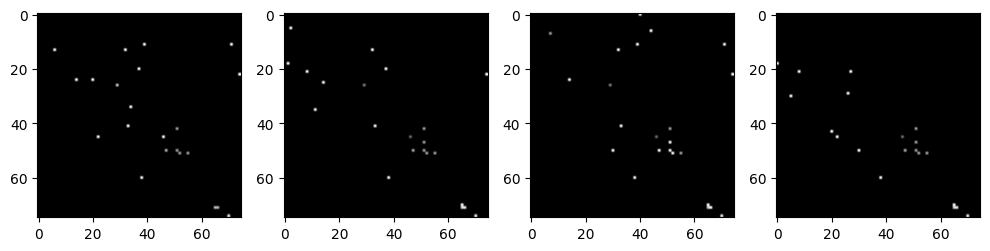

In [19]:
# The trained transformer can then be used to transform sample data to image matricies.

# Size of the iamge
it.pixels = 34
X_train_img = itpca.fit_transform(X_train_norm.to_numpy())
fig, ax = plt.subplots(1, 4, figsize=(10, 10))

for i in range(0,4):
    ax[i].imshow(X_train_img[i])
plt.tight_layout()

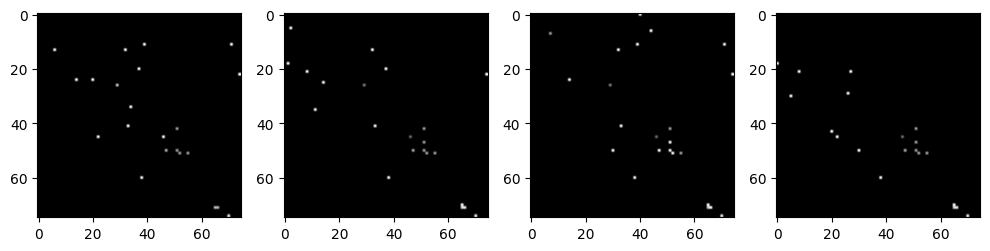

In [20]:
# Test dataset

X_test_img = itpca.transform(X_test_norm.to_numpy())

fig, ax = plt.subplots(1, 4, figsize=(10, 10))

for i in range(0,4):
    ax[i].imshow(X_test_img[i])
plt.tight_layout()

# Save

In [21]:
# Saving datasets
# Saving the dataset as a pickle file, can't save image datasets as dataframes it must be a 2d input

path = 'datasets/images/Syphilis_tsne_34x34.pkl'

with open(path, 'wb') as file:
  pickle.dump(X_train_img, file)
  pickle.dump(X_test_img, file)